 ## Prediction Water Quality Assurance using ML

This notebook looks into using various Pyhton-based Machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attribute.

we're going to take the following approch:

1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


### 1. Problem Defination

In a statement,

Given parameters, we need predict that water is drinkable or not.

### 2. Data

we've downloaded it in a formatted way from Kaggle.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable. Such that water's Ph Value, Hardness, Solids (Total dissolved solids - TDS),Sulfate, Conductivity and many form to get the better quality of water.


### 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project. The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

### 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.


Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

### 5. Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

pandas for data analysis.

NumPy for numerical operations.

Matplotlib/seaborn for plotting or data visualization.

Scikit-Learn for machine learning modelling and evaluation.
  


In [1]:
#Importing Regular EDA and plotting libraries

import numpy as np
np_bool = bool
import numpy as np
np_float = float

import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import matplotlib.pyplot as plt

## Models & Models Evalutaers

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report

## Import Warnings

from warnings import filterwarnings

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
data=pd.read_csv("water_potability.csv")

In [3]:
df = pd.DataFrame(data)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [8]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

### Data Visualization

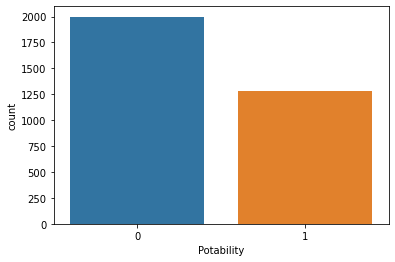

In [9]:
sns.countplot(data = df, x = 'Potability')

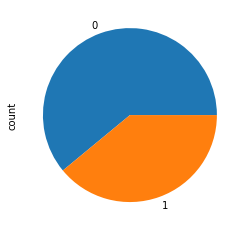

In [10]:

df.Potability.value_counts().plot(kind ='pie')
     

In [21]:
df.drop('Potability', axis=1).skew()
     

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [22]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Water Quality Heat Map')

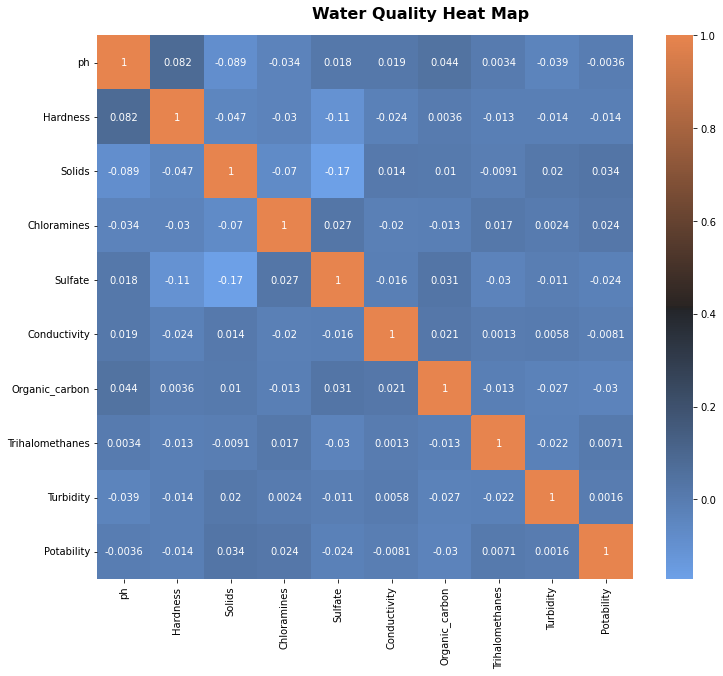

In [23]:
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap)
plt.suptitle('Water Quality Heat Map', y = 0.92, size = 16, color = 'black', weight='bold')

In [24]:
df.corr().abs()['Potability'].sort_values(ascending = False)
     

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.5, 1.01, 'Water Quality Pair-Plot')

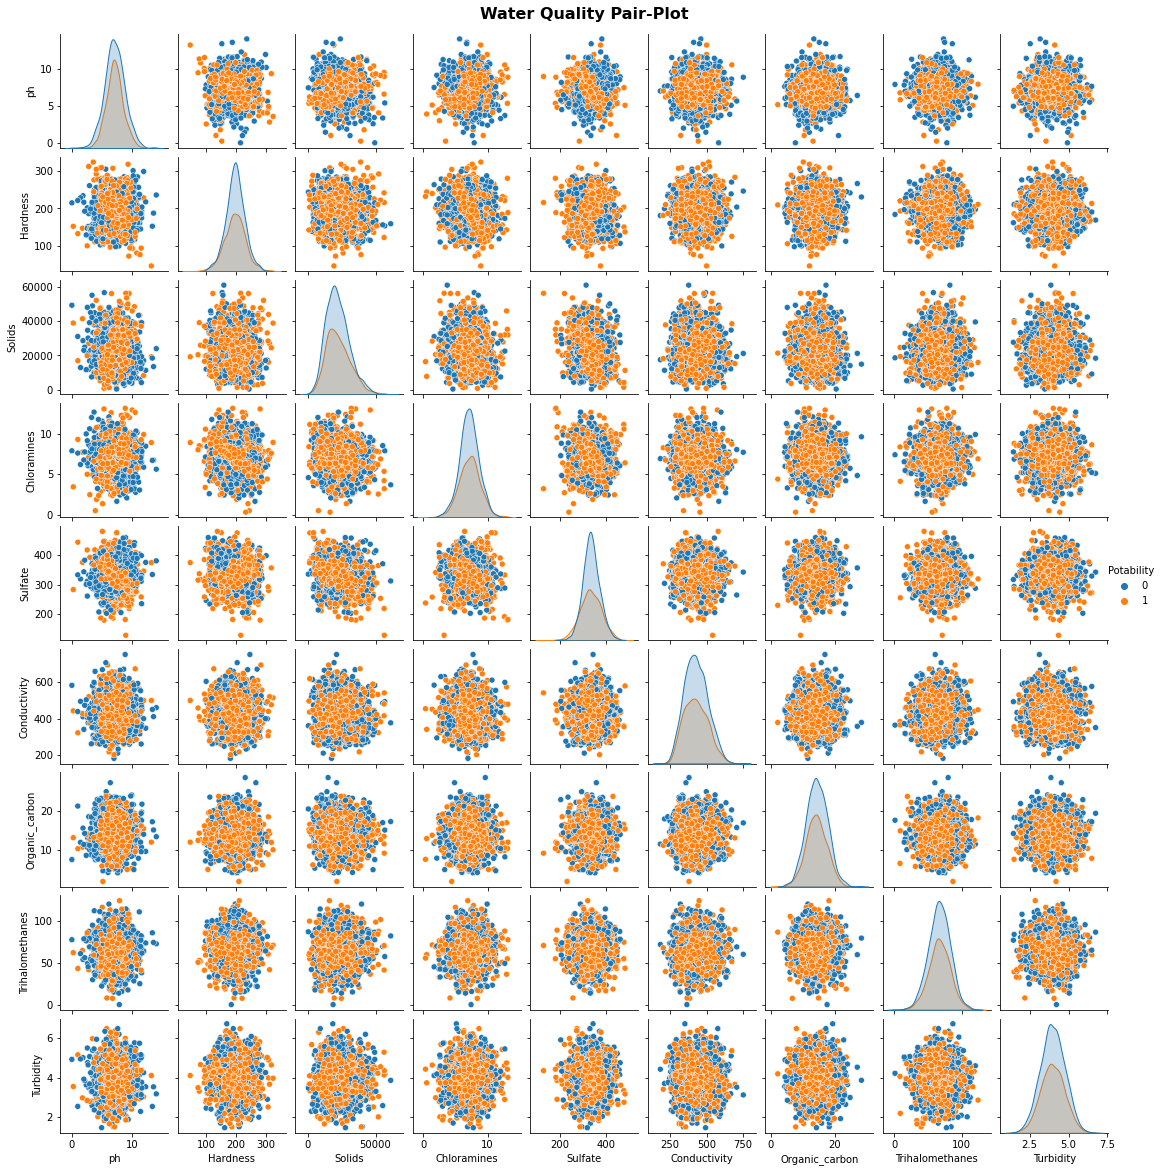

In [25]:
ax = sns.pairplot(df, hue = "Potability", diag_kind = "kde", kind = "scatter")
ax.fig.set_size_inches(16,16)
ax.fig.suptitle('Water Quality Pair-Plot',y=1.01, size = 16, color = 'black', weight='bold')

Text(0.5, 1.01, 'Water Quality Box-Plot')

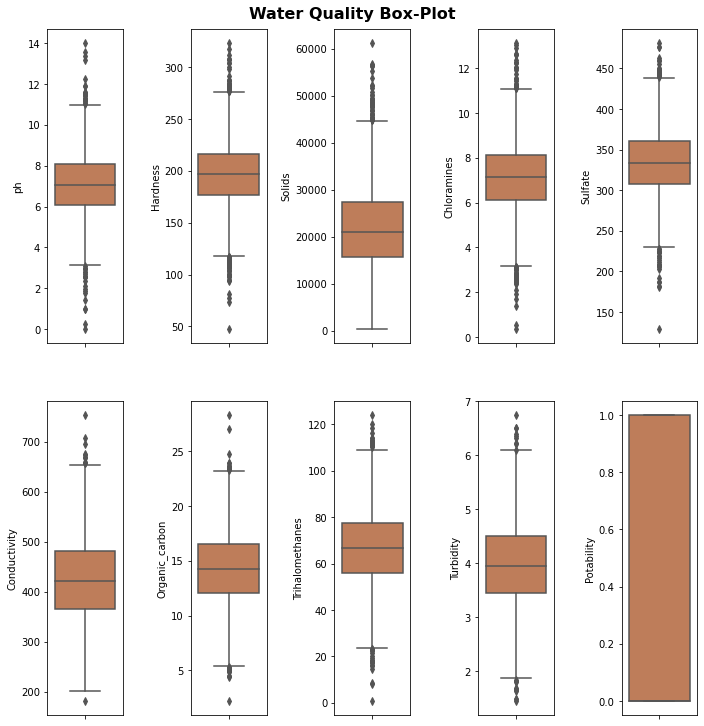

In [26]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index], color="#cf7849")
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)

plt.suptitle('Water Quality Box-Plot',y=1.01, size = 16, color = 'black', weight='bold')
     

### Data Preprocess

In [27]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

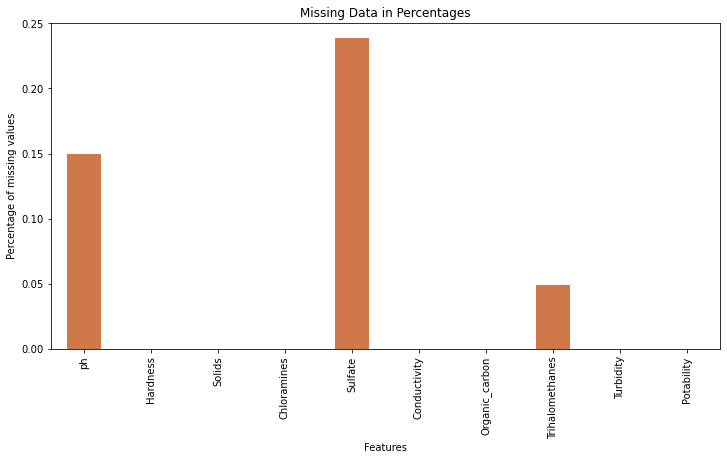

In [28]:
df.isnull().mean().plot.bar(figsize=(12,6), color="#cf7849") 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [29]:
df.isnull().mean()*100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [30]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [31]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

The three features with missing values all have Gaussian distribution therefore it is a safe assumption to use the mean of each feature to fill in for the missing values.



In [32]:
df1 = df.copy()
df1['ph'].fillna(value=df1['ph'].mean(),inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(),inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(),inplace=True)

In [33]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [34]:
df1.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [35]:
df1.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


## Dealing with Outliers


Since the features have Gaussian distribution we can trim out the outliers data outside of 3 standard deviations.


In [36]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis=1)]

In [37]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis=1)]
     

In [38]:
df_water.shape

(3128, 10)

Text(0.5, 1.01, 'Water Quality Box-Plot (after outlier trimming)')

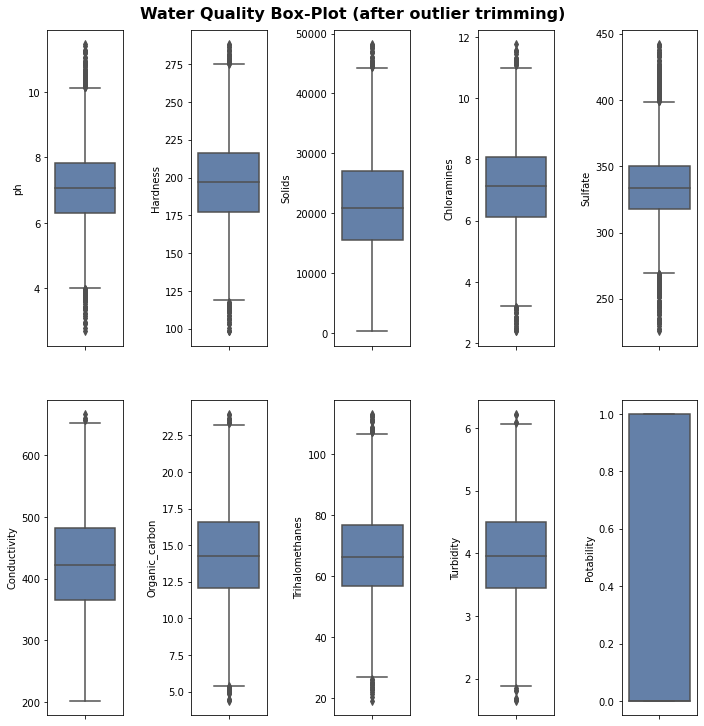

In [39]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df_water.items():
    sns.boxplot(y=attributeCol, data=df_water, ax=ax[index], color='#597eb3')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('Water Quality Box-Plot (after outlier trimming)',y=1.01, size = 16, color = 'black', weight='bold')
     

## Dealing with Class Imbalance

In [40]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]
     


Random over-sampling:
Potability
0    1930
1    1930
Name: count, dtype: int64


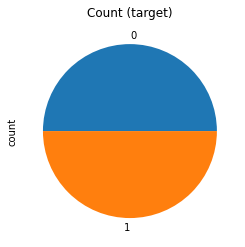

In [41]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Potability.value_counts())

df_test_over.Potability.value_counts().plot(kind='pie', title='Count (target)');
     

In [42]:
df_water['Potability'].value_counts()

Potability
0    1930
1    1198
Name: count, dtype: int64

## Preprocessing: Train-test split and standardized scaler




In [43]:
from sklearn.model_selection import train_test_split
X = df_test_over.drop('Potability',axis=1)
y = df_test_over['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [44]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [45]:

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (3088, 9) 
y_train: (3088,)
X_test: (772, 9) 
y_test: (772,)


## Model Training 

In [46]:
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1. Logistic Regression 

In [47]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)
     

print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))
     

The accuracy for Logistic Regression is 0.5038860103626943
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.53      0.43      0.47       400
           1       0.49      0.58      0.53       372

    accuracy                           0.50       772
   macro avg       0.51      0.51      0.50       772
weighted avg       0.51      0.50      0.50       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

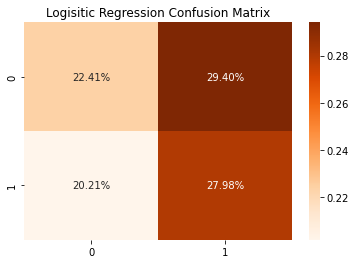

In [48]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Logisitic Regression Confusion Matrix")

In [49]:
## 2. K-Nearest Neighbour Regression 

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred) 
KNN_recall = recall_score(y_test, KNN_pred) 
KNN_f1 = f1_score(y_test, KNN_pred)
     

print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.6606217616580311
The classification report using KNeighbors is: 0.6606217616580311
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       400
           1       0.63      0.71      0.67       372

    accuracy                           0.66       772
   macro avg       0.66      0.66      0.66       772
weighted avg       0.66      0.66      0.66       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

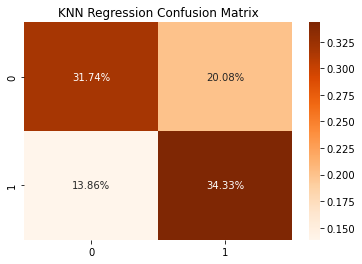

In [50]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("KNN Regression Confusion Matrix")

In [51]:
## 3. Decision Tree Classifier

DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred) 
DecTree_recall = recall_score(y_test, DecTree_pred) 
DecTree_f1 = f1_score(y_test, DecTree_pred)
     

print("The accuracy for Decision Tree is", DecTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.7409326424870466
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       400
           1       0.69      0.84      0.76       372

    accuracy                           0.74       772
   macro avg       0.75      0.74      0.74       772
weighted avg       0.75      0.74      0.74       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

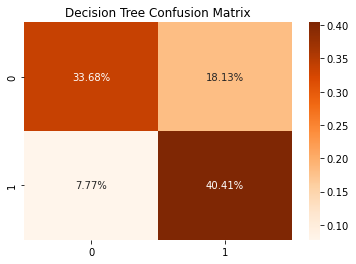

In [52]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Decision Tree Confusion Matrix")

In [53]:
## 4. Random Forest Classifier 

RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred) 
RFTree_recall = recall_score(y_test, RFTree_pred) 
RFTree_f1 = f1_score(y_test, RFTree_pred)
     

print("The accuracy for Random Forest is", RFTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))
     

The accuracy for Random Forest is 0.8484455958549223
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       400
           1       0.84      0.85      0.84       372

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

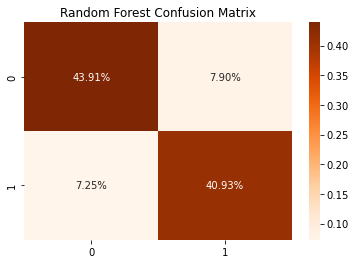

In [54]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Random Forest Confusion Matrix")

In [55]:
## 5. Support Vector Machine Classifier 

SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred) 
SVM_recall = recall_score(y_test, SVM_pred) 
SVM_f1 = f1_score(y_test, SVM_pred)
     

print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))
     

The accuracy for SVM is 0.6489637305699482
The classification report using SVM is: 0.6489637305699482
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       400
           1       0.64      0.62      0.63       372

    accuracy                           0.65       772
   macro avg       0.65      0.65      0.65       772
weighted avg       0.65      0.65      0.65       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

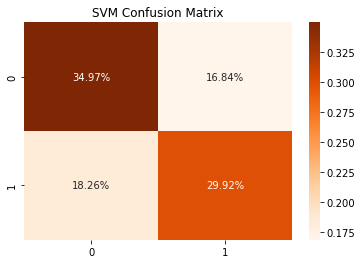

In [56]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("SVM Confusion Matrix")

In [57]:
## 6. XGBoost Classifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)
     

print("The accuracy for XGBoost is", XGB_acc)
print("The classification report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.8173575129533679
The classification report using XGBoost is: 0.8173575129533679
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       400
           1       0.78      0.86      0.82       372

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

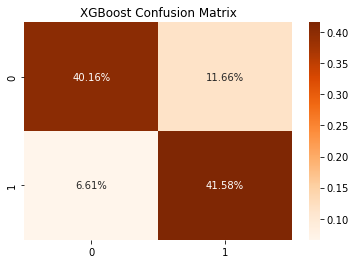

In [58]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("XGBoost Confusion Matrix")
     

In [59]:
## Algorithm Comparison 
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1]
})
models = models.sort_values(by='Accuracy', ascending=False)
     

In [60]:
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.848446,0.838196,0.849462,0.843792
5,XGBoost,0.817358,0.781022,0.862903,0.819923
2,Decision Tree,0.740933,0.690265,0.838710,0.757282
1,KNN Regression,0.660622,0.630952,0.712366,0.669192
4,Support Vector,0.648964,0.639889,0.620968,0.630286
0,Logistic Regression,0.503886,0.487585,0.580645,0.530061


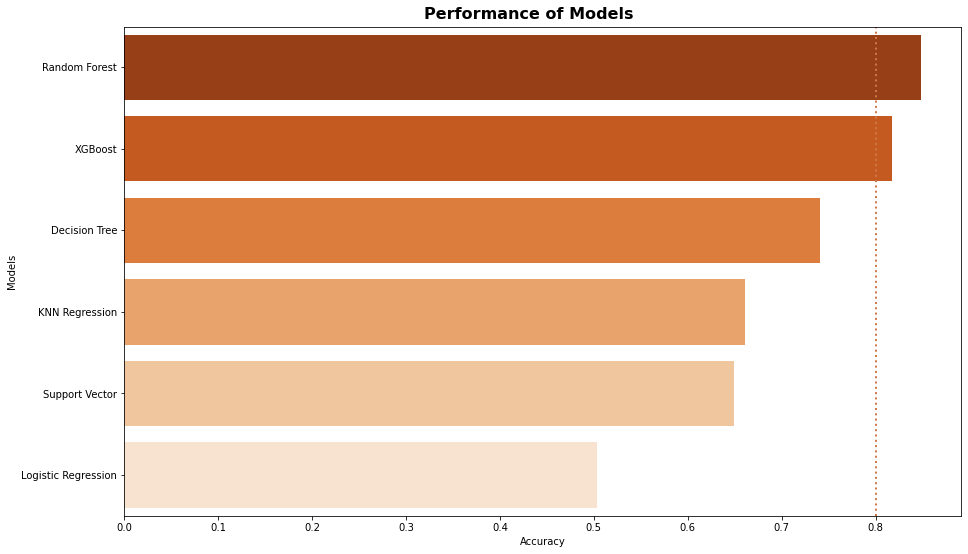

In [61]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Oranges_r')

ax.figure.suptitle('Performance of Models',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

## Conclusion

### After the first iteration of model training we can see that Logistic Regression performed the lowest while KNN, SVM and Decision Tree had close accuracy values around 64% to 74%. XGBoost had a 74% accuracy while Random Forest was able to be accurate to 84%